# Part one of the Mini-Project required for completion of LaunchCode's CoderGirl program - Data Science track.

### This portion of the project entails performing exploratory data analysis on data from [UCI's Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#). The intention of this project is to build a model (in part two) that can predict heart disease.

### This project was performed independently, using the resources and methods provided by LaunchCode's mentors over the past six months. 

## Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('heart.csv')
y = data.target
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The attribute information, available on the Kaggle page for the dataset, is as follows:
> 1. age
> 2. sex (1=male, 0=female)
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl (1=true, 0=false)
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The 'target' attribute is either 1 (heart disease) or 0 (no heart disease).

In [3]:
data.columns = ['age', 'sex', 'pain', 'bpRest', 'chol', 'sugar', 'restecg', 'hrMax', 'exAng', 'STdep', 'slopeST', 'vessels', 'thal', 'target']
data.drop(columns='restecg', inplace=True)
data.head()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1


I cleaned up the dataframe column titles to make more sense to me and be easier to read.
Some concepts required some more information than what was provided:
> 3. Chest pain type: 1=typical, 2=atypical, 3=non-anginal, 4=asymptomatic
> 10. ST depression refers to the deviation of the ST segment, recorded by an ECG, which is abnormally low.
> 13. 'Thal' is short for Thalassemia (I believe), which is an inherited blood disorder that causes one's blood to have lower hemoglobin than normal, thus carrying less oxygen. It can have varying degrees of severity (see above).

I could not find information regarding what the values for 'restecg' denote, so it has been dropped. (Typically I would make sure to find this information, but for the purposes of this project I am confident that I have enough data to create a capable model.)

# Cleaning the Data

In [4]:
data.describe()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Before I continue with any data cleaning, I want to make sure I'm not missing any values or have any other basic data issues:
* I can see from the counts of each feature that no values are missing.
* I can also see from a brief look over the columns that there are somewhat significant outliers in the "chol" and "STdep" columns.

In [5]:
# Check for duplicates
data[data.duplicated(keep=False)]

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
163,38,1,2,138,175,0,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,173,0,0.0,2,4,2,1


In [6]:
# Drop the duplicates found
data = data.drop_duplicates()

In [7]:
# Check for outliers
chol_outliers = data[data['chol'] > data['chol'].mean() + 3 * data['chol'].std()]
STdep_outliers = data[data['STdep'] > data['STdep'].mean() + 3 * data['STdep'].std()]
print(chol_outliers, STdep_outliers)

     age  sex  pain  bpRest  chol  sugar  hrMax  exAng  STdep  slopeST  \
28    65    0     2     140   417      1    157      0    0.8        2   
85    67    0     2     115   564      0    160      0    1.6        1   
220   63    0     0     150   407      0    154      0    4.0        1   
246   56    0     0     134   409      0    150      1    1.9        1   

     vessels  thal  target  
28         1     2       1  
85         0     3       1  
220        3     3       0  
246        2     3       0        age  sex  pain  bpRest  chol  sugar  hrMax  exAng  STdep  slopeST  \
204   62    0     0     160   164      0    145      0    6.2        0   
221   55    1     0     140   217      0    111      1    5.6        0   

     vessels  thal  target  
204        3     3       0  
221        0     3       0  


In [8]:
# Drop outliers
data.drop([28, 85, 220, 246, 204, 221], inplace=True)

In [9]:
data.describe()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.280405,0.692568,0.969595,131.435811,244.138514,0.148649,149.638514,0.327703,0.996284,1.408784,0.702703,2.304054,0.547297
std,9.063192,0.462212,1.032894,17.589941,45.652903,0.356344,23.010854,0.470171,1.086412,0.609354,0.994626,0.612400,0.498601
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,152.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


I chose to drop the outliers from the 'chol' and 'STdep' columns because, for the purposes of the project, I am more concerned with making a model that is reliable, rather than one that is as comprehensive as possible.

I also chose to drop the duplicate row of data, so as to prevent any level of bias that data point may have added to the results.

## Relationships of the Features to the Target Data

I split the dataset in half, including the target feature in both halves, in order to get a reasonably-sized correlation matrix of each feature to the target feature.

*Open image in new tab for closer viewing.*
<img src='heart-disease-data-overview.png'>

Text(0.5, 1, 'Heatmap of Correlations')

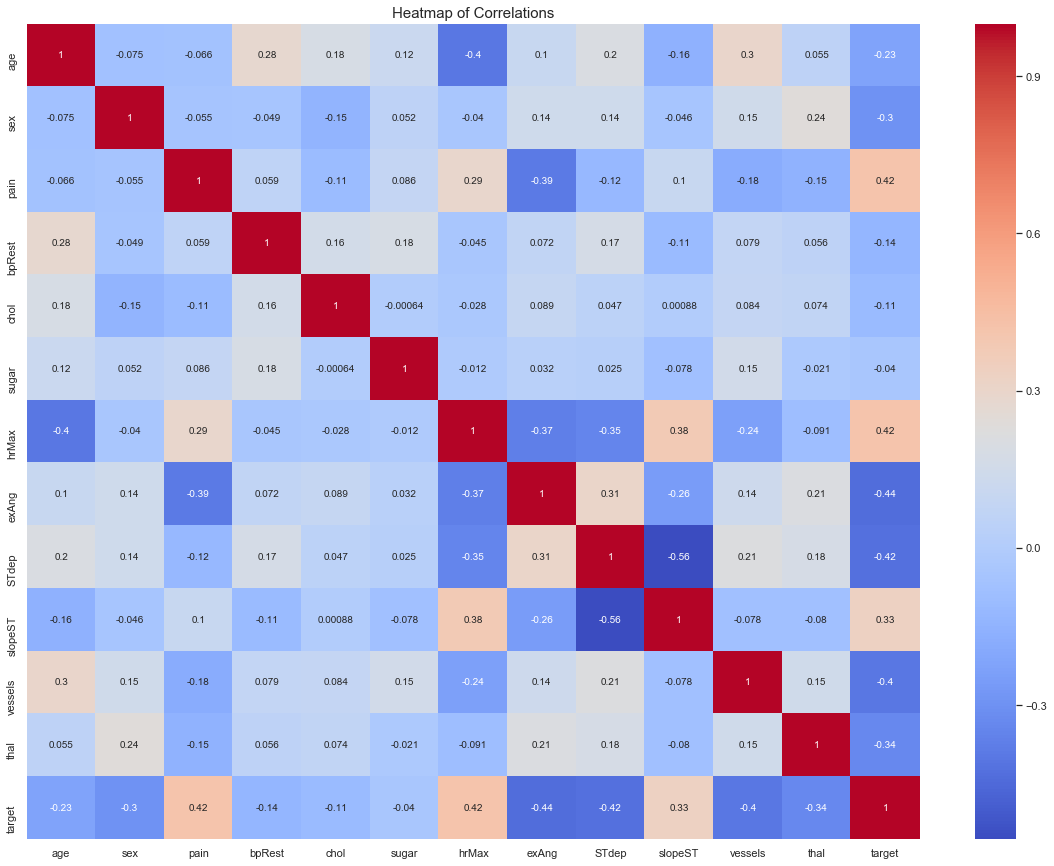

In [10]:
# Correlation Heatmap
corr = data.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', ax=ax, annot=True)
ax.set_title("Heatmap of Correlations", size=15)

Since I am able to spot several moderate correlations from the heatmap between the target feature and others, I will focus the remainder of my analysis on the following features and their relationship to the target:
* Pain Type
* Maximum Heart Rate Achieved
* Exercise-Induced Angina
* ST Depression (induced by exercise)
* Number of Major Vessels (colored by flouroscopy)

I will also include a simple distribution of how age and sex relate to the presence of heart disease in this dataset, for the sake of providing an overview of the sample population.

### Heart Disease by Age & Sex

In [11]:
# Create a new feature, 'age_group', to simplify the visualization of age distribution
data['age_group'] = data['age'].apply(lambda value: '30\'s' if value <=39
                                     else '40\'s' if value <=49
                                     else '50\'s' if value <=59
                                     else '60\'s' if value <=69
                                     else '70\'s')
data['age_group'] = pd.Categorical(data['age_group'], categories=['30\'s', '40\'s', '50\'s', '60\'s', '70\'s'])

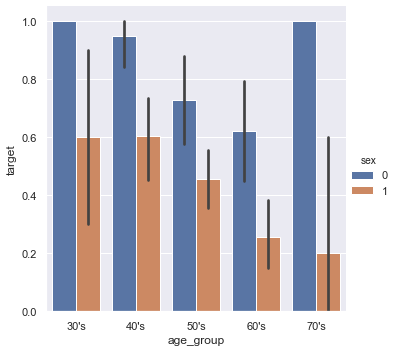

In [16]:
# Distribution of ages by presence of heart disease and sex
sns.catplot(x='age_group', y='target', hue='sex', kind='bar', data=data)

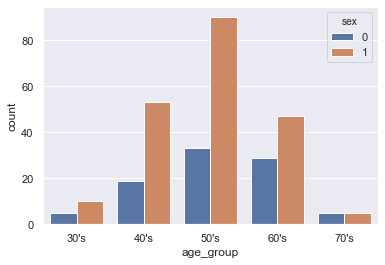

In [15]:
# Distribution of ages by sex
sns.countplot(x='age_group', hue='sex', data=data)

### Heart Disease by Pain Type

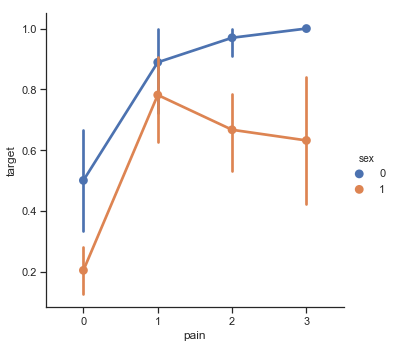

In [114]:
sns.catplot(x='pain', y='target', hue='sex', kind='point', data=data)

### Heart Disease by Maximum Heart Rate Achieved

In [27]:
data['hrMax_bins'] = data['hrMax'].apply(lambda x: '70-84' if x <= 84
                                        else '85-99' if x <= 99
                                        else '100-119' if x <= 119
                                        else '120-139' if x <= 139
                                        else '140-159' if x <= 159
                                        else '160-179' if x <= 179
                                        else '180-202')

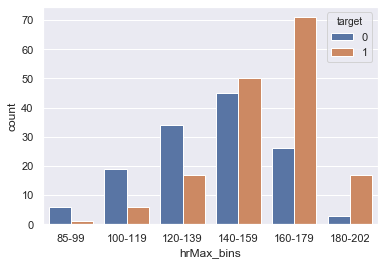

In [29]:
sns.countplot('hrMax_bins', hue='target', data=data, order=['85-99', '100-119', '120-139', '140-159',
                                                            '160-179', '180-202'])

From the above plot, we can see that there seems to be no correlation between age and maximum heart rate for those who do not have heart disease, but among those that *do* have heart disease, there is a negative correlation between the two features.

### Heart Disease by Presence of Exercise Induced Angina

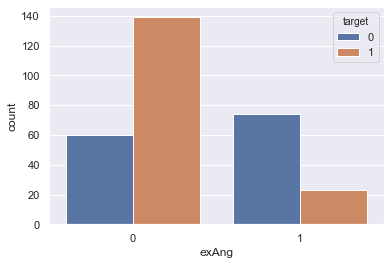

In [18]:
sns.countplot('exAng', hue='target', data=data)

### Heart Disease by Depression of the ST Curve (as measured by ECG)

In [21]:
data['STdep_bins'] = data['STdep'].apply(lambda x: 0 if x <= .4
                                        else 1 if x <= 1.4
                                        else 2 if x <= 2.4
                                        else 3 if x <= 3.4
                                        else 4)

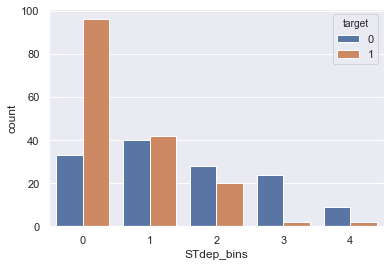

In [22]:
sns.countplot('STdep_bins', hue='target', data=data)

In [23]:
### Heart Disease by Number of Major Vessels Colored by Fluoroscopy

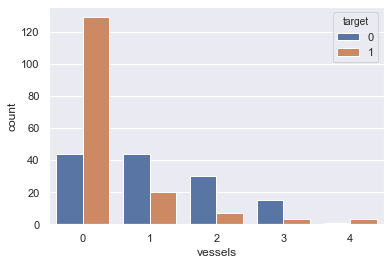

In [24]:
sns.countplot('vessels', hue='target', data=data)

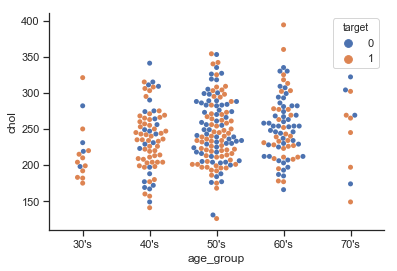

In [13]:
sns.set(style='ticks')
hd_data = data

sns.swarmplot('age_group', 'chol', data=hd_data, hue='target')
sns.despine()

Text(0, 0.5, 'Cholesterol Levels')

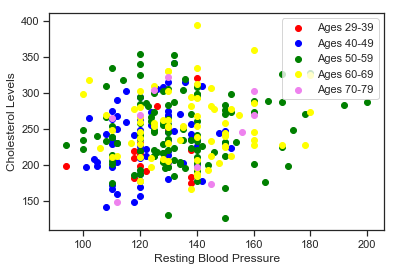

In [22]:
y = data.age_group
x = data

plt.scatter(x[y=='30\'s']['bpRest'], x[y=='30\'s']['chol'], label='Ages 29-39', c='red')
plt.scatter(x[y=='40\'s']['bpRest'], x[y=='40\'s']['chol'], label='Ages 40-49', c='blue')
plt.scatter(x[y=='50\'s']['bpRest'], x[y=='50\'s']['chol'], label='Ages 50-59', c='green')
plt.scatter(x[y=='60\'s']['bpRest'], x[y=='60\'s']['chol'], label='Ages 60-69', c='yellow')
plt.scatter(x[y=='70\'s']['bpRest'], x[y=='70\'s']['chol'], label='Ages 70-79', c='violet')

plt.legend()
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Levels')

Text(0, 0.5, 'Cholesterol Levels')

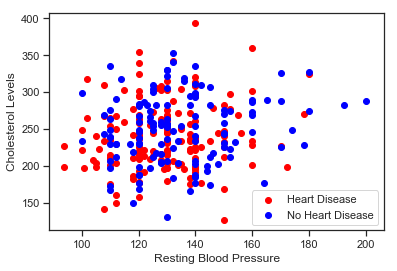

In [23]:
y = data.target
x = data

plt.scatter(x[y==1]['bpRest'], x[y==1]['chol'], label='Heart Disease', c='red')
plt.scatter(x[y==0]['bpRest'], x[y==0]['chol'], label='No Heart Disease', c='blue')

plt.legend()
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Levels')